# Setup

In [1]:
import sklearn
assert sklearn.__version__ >= "0.23.1"

import numpy as np
assert np.__version__ >= "1.19.1"

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
assert sns.__version__ >= "0.10.1"



# Load data

In [2]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, PowerTransformer, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')  

In [3]:
import pandas as pd
assert pd.__version__ >= "1.1.0"

# Model will be trained using this data.
def load_training_data():
    data = pd.read_csv('../data/titanic/train.csv')
    return data

# This data will only be used when submitting the final analysis.
# It also doesn't contain the Survived column.
def load_testing_data():
    data = pd.read_csv('../data/titanic/test.csv')
    return data

In [4]:
train_set, test_set = train_test_split(load_training_data(), test_size=0.2, random_state=1)
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
301,302,1,3,"McCoy, Mr. Bernard",male,NaN,2,0,367226,23.2500,NaN,Q
309,310,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,E36,C
516,517,1,2,"Lemore, Mrs. (Amelia Milley)",female,34.0,0,0,C.A. 34260,10.5000,F33,S
120,121,0,2,"Hickman, Mr. Stanley George",male,21.0,2,0,S.O.C. 14879,73.5000,NaN,S
570,571,1,2,"Harris, Mr. George",male,62.0,0,0,S.W./PP 752,10.5000,NaN,S


In [5]:
X_train = train_set.drop('Survived', axis=1)
y_train = train_set.Survived
X_test = test_set.drop('Survived', axis=1)
y_test = test_set.Survived

In [6]:
# The output of this doesn't have any missing values
preprocessor1 = ColumnTransformer(
    transformers=[
        ('pclass',          'passthrough',                                    ['Pclass']),
        ('sex',             'passthrough',                                    ['Sex']),
        ('age',             SimpleImputer(strategy='median'),                 ['Age']),
        ('fare',            SimpleImputer(strategy='median'),                 ['Fare']),
    ])
preprocessor1

ColumnTransformer(transformers=[('pclass', 'passthrough', ['Pclass']),
                                ('sex', 'passthrough', ['Sex']),
                                ('age', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('fare', SimpleImputer(strategy='median'),
                                 ['Fare'])])

In [7]:
# This calculates new variables
preprocessor2 = ColumnTransformer(
    transformers=[
        ('pclass',          'passthrough',                             [0]),
        ('sex',             'passthrough',                             [1]),
        ('age',             'passthrough',                             [2]),
        ('fare',            'passthrough',                             [3]),
    ])
preprocessor2

ColumnTransformer(transformers=[('pclass', 'passthrough', [0]),
                                ('sex', 'passthrough', [1]),
                                ('age', 'passthrough', [2]),
                                ('fare', 'passthrough', [3])])

In [8]:
# OneHotEncode categorical variables
preprocessor3 = ColumnTransformer(
    transformers=[
        ('pclass',          'passthrough',       [0]),
        ('sex',             OrdinalEncoder(),     [1]),
        ('age',             'passthrough',       [2]),
        ('fare',            'passthrough',       [3]),
    ])
preprocessor3

ColumnTransformer(transformers=[('pclass', 'passthrough', [0]),
                                ('sex', OrdinalEncoder(), [1]),
                                ('age', 'passthrough', [2]),
                                ('fare', 'passthrough', [3])])

In [9]:
# Just testing
pd.DataFrame(Pipeline(steps=[
    ('pp1', preprocessor1),
]).fit_transform(X_train)).sample(10)

,0,1,2,3
516,2,female,29,12.35
57,3,female,29,23.45
580,2,female,31,26.25
463,1,female,26,78.85
434,3,female,29,69.55
307,3,male,30.5,8.05
620,3,male,6,12.475
365,3,male,29,8.6625
356,3,female,31,20.525
220,3,male,29,24.15


In [10]:
# Just testing
pd.DataFrame(Pipeline(steps=[
    ('pp1', preprocessor1),
    ('pp2', preprocessor2),
]).fit_transform(X_train)).sample(10)

,0,1,2,3
608,1,female,24,69.3
99,1,female,39,79.65
530,3,male,19,7.8958
646,1,male,29,27.7208
650,1,male,42,52.5542
147,1,male,0.92,151.55
668,1,female,21,77.9583
378,3,male,51,7.75
163,3,male,22,7.225
589,3,male,34.5,6.4375


In [11]:
# Just testing
pd.DataFrame(Pipeline(steps=[
    ('pp1', preprocessor1),
    ('pp2', preprocessor2),
    ('pp3', preprocessor3),
]).fit_transform(X_train))

,0,1,2,3
0,3,1,29,23.25
1,1,0,30,56.9292
2,2,0,34,10.5
3,2,1,21,73.5
4,2,1,62,10.5
...,...,...,...,...
707,3,1,19,7.65
708,3,0,30.5,7.75
709,2,1,21,73.5
710,3,0,29,7.55


In [12]:
pp = Pipeline(steps=[
    ('pp1', preprocessor1),
    ('pp2', preprocessor2),
    ('pp3', preprocessor3),
]) 
pp

Pipeline(steps=[('pp1',
                 ColumnTransformer(transformers=[('pclass', 'passthrough',
                                                  ['Pclass']),
                                                 ('sex', 'passthrough',
                                                  ['Sex']),
                                                 ('age',
                                                  SimpleImputer(strategy='median'),
                                                  ['Age']),
                                                 ('fare',
                                                  SimpleImputer(strategy='median'),
                                                  ['Fare'])])),
                ('pp2',
                 ColumnTransformer(transformers=[('pclass', 'passthrough', [0]),
                                                 ('sex', 'passthrough', [1]),
                                                 ('age', 'passthrough', [2]),
                                                 ('fare', 'passthrough',
                                                  [3])])),
                ('pp3',
                 ColumnTransformer(transformers=[('pclass', 'passthrough', [0]),
                                                 ('sex', OrdinalEncoder(), [1]),
                                                 ('age', 'passthrough', [2]),
                                                 ('fare', 'passthrough',
                                                  [3])]))])

In [13]:
# y_train contains the labels
X_train_pp = pp.fit_transform(X_train)

In [14]:
# y_test contains the labels
X_test_pp = pp.transform(X_test)

In [15]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve

In [16]:
sgd_clf = SGDClassifier()

In [17]:
cross_val_score(sgd_clf, X_train_pp, y_train, cv=2, scoring="accuracy")

array([0.71067416, 0.62359551])

In [18]:
y_train_pred = cross_val_predict(sgd_clf, X_train_pp, y_train, cv=3)

In [19]:
confusion_matrix(y_train, y_train_pred)

array([[347,  96],
       [125, 144]])

In [20]:
precision_score(y_train, y_train_pred)

0.6

In [21]:
recall_score(y_train, y_train_pred)

0.5353159851301115

In [22]:
f1_score(y_train, y_train_pred)

0.5658153241650294

In [23]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown

In [24]:
y_scores = cross_val_predict(sgd_clf, X_train_pp, y_train, cv=3, method="decision_function")

In [25]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

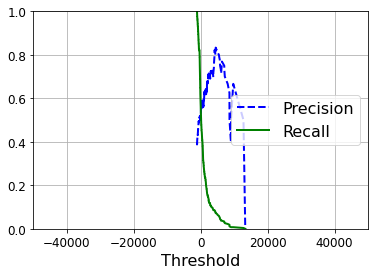

In [26]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [27]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

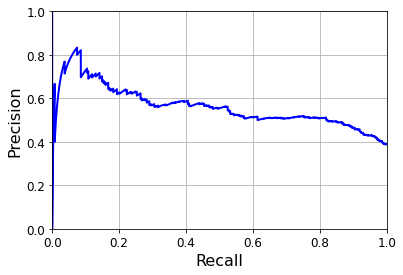

In [28]:
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [29]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

In [30]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

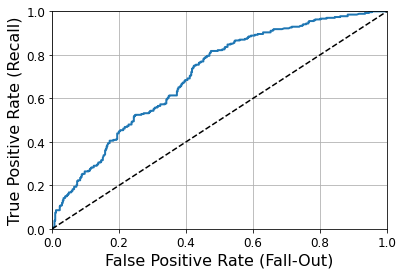

In [31]:
plot_roc_curve(fpr, tpr)

In [32]:
forest_clf = RandomForestClassifier()

In [33]:
y_probas_forest = cross_val_predict(forest_clf, X_train_pp, y_train, cv=5, method="predict_proba")

In [34]:
y_scores_forest = y_probas_forest[:, 1]

In [35]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, y_scores_forest)

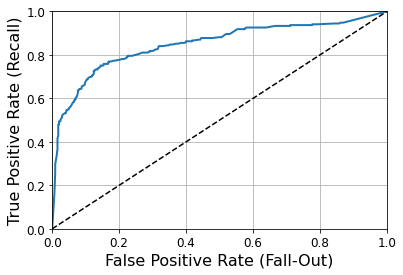

In [36]:
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")

In [37]:
forest_clf2 = RandomForestClassifier(n_estimators=500)

In [38]:
forest_clf2.fit(X_train_pp, y_train)

RandomForestClassifier(n_estimators=500)

In [39]:
forest_clf2.feature_importances_

array([0.10582239, 0.28451888, 0.28750603, 0.3221527 ])

# Output final test set predictions for uploading to Kaggle

In [40]:
final_test_set = load_testing_data()

In [41]:
res = pd.concat([
    pd.DataFrame(final_test_set.PassengerId, columns=['PassengerId']),
    pd.DataFrame(clf.predict(final_test_set), columns=['Survived'])
    ], axis=1).astype({'Survived':'int'})
res

NameError: name 'clf' is not defined

In [42]:
res.to_csv('titanic_out.csv', index=False)

NameError: name 'res' is not defined